# **Exercises for Lecture 2**

**109301060 貿四乙 李叡**

#### Q1.a

In [353]:
import wooldridge as woo
import statsmodels.formula.api as smf
import numpy as np

ceosal2 = woo.dataWoo('ceosal2')
y = ceosal2['salary']
x = ceosal2['ceoten']

In [354]:
# a. Average salary and tenure
avg_sal = np.mean(y)
avg_ten = np.mean(x)

print(round(avg_sal, 2))
print(round(avg_ten, 2))

865.86
7.95


#### Q1.b

In [355]:
# b. How many CEO's are in their first year?
ten_year1 = np.sum(x==0)

print(ten_year1) 

# Longest tenure 
ten_max = np.max(x)

print(ten_max)


5
37


#### Q1.c

In [356]:
# c. Estimate the regression
reg = smf.ols('np.log(salary) ~ ceoten', data = ceosal2)
results = reg.fit()
b = results.params

# Print parameter estimates
print(f'b: \n{b}\n')

# Print results using summary:
print(f'results.summary(): \n{results.summary()}\n')

# Print regression table
import pandas as pd

table = pd.DataFrame({'b': round(b, 4),
                      'se': round(results.bse, 4),
                      't': round(results.tvalues, 4),
                      'pval': round(results.pvalues, 4)})
print(f'table: \n{table}\n')

b: 
Intercept    6.505498
ceoten       0.009724
dtype: float64

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:         np.log(salary)   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.334
Date:                Tue, 16 Apr 2024   Prob (F-statistic):              0.128
Time:                        09:10:56   Log-Likelihood:                -160.84
No. Observations:                 177   AIC:                             325.7
Df Residuals:                     175   BIC:                             332.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

$0.97\%$ increase in salary given one more year as a CEO.

#### Q2.a

In [357]:
import scipy.stats as stats
import numpy as np
import statsmodels.formula.api as smf
import pandas as pd

# a. Generate 500 uniform random variable x
# Lower = loc, Upper = loc + scale 
x = stats.uniform.rvs(loc = 0, scale = 10, size = 500)

# Sample mean and standard deviation of x
mean_x = x.mean()
std_x = x.std()
print(mean_x)
print(std_x)

4.963334976122681
2.7863943061386656


#### Q2.b

In [358]:
# b. Generate 500 N(0, 36) variable u
u = stats.norm.rvs(loc = 0, scale = np.sqrt(36), size = 500)
mean_u = u.mean()
std_u = u.std()
print(mean_u)
print(std_u)

0.02234090133816153
5.822551531428157


Although the $u$ sample mean and standard deviation have some deviations from the theoretical
values, they are within a reasonable range.
Therefore, it can be considered that the generated $u$ data satisfies the assumption of obeying the $N(0, 36)$.

#### Q2.c

In [359]:
# c. Generate y = 1 + 2x +u
y = 1 + 2*x + u

data1 = pd.DataFrame({'y':y, 'x': x})

# Run the regression
reg = smf.ols(formula = 'y~x', data = data1)
results = reg.fit()

# Parameter estimates
b = results.params
print(f'b:\n{b}\n')

b:
Intercept    0.264935
x            2.152600
dtype: float64



$\beta_1$ is close to the theoretical value.

$\beta_0$ is far different from the theoretical value, but the intercept $\beta_1$ is more easily affected by the
randomness of $u$.

Overall, although the estimated value of $\beta_0$ deviates from the true value, the estimated value of $\beta_1$ is very accurate, and the overall regression model captures the linear relationship between $y$ and $x$, so the regression result is satisfactory.

#### Q2.d

In [360]:
# d. OLS residuals
# Two ways to get the residuals 
u_hat1 = results.resid

# Verify properties of residuals (use u_hat1)
sum_u_hat1 = u_hat1.sum()
print(sum_u_hat1)

x_u_hat1 = (x * u_hat1).sum() 
print(x_u_hat1)

2.3661073100811336e-12
1.3812950783176348e-11


$\sum \limits_{i=1} ^n\hat{u_i}$ and $\sum\limits_{i=1} ^n x_i\hat{u_i}$ are all close to $0$, and the characteristics are established.

#### Q2.e

In [361]:
# e. Use u 
sum_u = u.sum()
print(sum_u)

x_u = (x*u).sum()
print(x_u)

11.170450669080765
647.836058760705


Obviously $\sum \limits_{i=1} ^n {u_i}$ and $\sum\limits_{i=1} ^n x_i u_i$ are not equal to $0$, and the characteristics do not hold.

This is reasonable because the least squares residual $\hat{u_i}$ is specially constructed to satisfy theseproperties.

But the real error term $u_i$ is randomly generated.

#### Q2.f

In [362]:
# a. Generate 500 uniform random variable x
# Lower = loc, Upper = loc + scale 
x1 = stats.uniform.rvs(loc = 0, scale = 10, size = 500)

# Sample mean and standard deviation of x
mean_x = x1.mean()
std_x = x1.std()
print('mean_x:',mean_x)
print('std_x:',std_x)

# b. Generate 500 N(0, 36) variable u
u1 = stats.norm.rvs(loc = 0, scale = np.sqrt(36), size = 500)
mean_u = u1.mean()
std_u = u1.std()
print('mean_u:',mean_u)
print('std_u:',std_u)

print('--------------------------')
# c. Generate y = 1 + 2x +u
y1 = 1 + 2*x1 + u1

data2 = pd.DataFrame({'y':y1, 'x': x1})

# Run the regression
reg = smf.ols(formula = 'y~x', data = data2)
results = reg.fit()

# Parameter estimates
b = results.params
print(f'b:\n{b}\n')
print('--------------------------')

# d. OLS residuals
# Two ways to get the residuals 
u_hat1 = results.resid

# Verify properties of residuals (use u_hat1)
sum_u_hat1 = u_hat1.sum()
print(sum_u_hat1)

x_u_hat1 = (x1 * u_hat1).sum() 
print(x_u_hat1)

# e. Use u 
sum_u = u1.sum()
print(sum_u)

x_u = (x1*u1).sum()
print(x_u)

mean_x: 4.920882160167661
std_x: 2.792962130931689
mean_u: -0.38946532625981
std_u: 5.976240329242176
--------------------------
b:
Intercept    0.538665
x            2.014605
dtype: float64

--------------------------
-2.1316282072803006e-13
-3.609557097661309e-12
-194.732663129905
-901.2920781265744


The conclusion of Q2.E still holds.

#### Q3.a

In [363]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# a. Import data
data = pd.read_csv('data_exercise_2c.csv')

#### Q3.b

In [364]:
# b. Transfer DATE to date
data['DATE'] = pd.to_datetime(data['DATE'])

#### Q3.c

In [365]:
# c. Calculate simple return
SP500_sr = np.diff(data['SP500'])/data['SP500'][:-1]
AAPL_sr = np.diff(data['AAPL_Close'])/data['AAPL_Close'][:-1]
AAPL_Adj_sr = np.diff(data['AAPL_Adj_Close'])/data['AAPL_Adj_Close'][:-1]

data['SP500_sr'] = np.append(np.nan, SP500_sr)
data['AAPL_sr'] = np.append(np.nan, AAPL_sr)
data['AAPL_Adj_sr'] = np.append(np.nan, AAPL_Adj_sr)

#### Q3.d

In [366]:
# d. Calculate risk premia
data['MKT_rp'] = data['SP500_sr'] - data['RF_%']/100
data['AAPL_rp'] = data['AAPL_sr'] - data['RF_%']/100
data['AAPL_Adj_rp'] = data['AAPL_Adj_sr'] - data['RF_%']/100

# Calculate summary statistics of these risk premia
results_sst = data[['MKT_rp', 'AAPL_rp', 'AAPL_Adj_rp']].describe()
print(results_sst)

           MKT_rp     AAPL_rp  AAPL_Adj_rp
count  116.000000  116.000000   116.000000
mean     0.008940    0.023283     0.024555
std      0.033172    0.080546     0.080221
min     -0.191881   -0.185845    -0.185845
25%     -0.003751   -0.026152    -0.026152
50%      0.013634    0.023168     0.026221
75%      0.027767    0.078010     0.078010
max      0.063280    0.214280     0.214280


#### Q3.e

In [367]:
# e. Fit CAPM 
data = data.drop(data.index[0])      # remove the row containing NaN

# AAPL_rf
capm = smf.ols('AAPL_rp ~ MKT_rp', data=data)
result_capm = capm.fit()
print(f'result_capm.summary():\n{result_capm.summary()}\n')

result_capm.summary():
                            OLS Regression Results                            
Dep. Variable:                AAPL_rp   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     30.30
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           2.31e-07
Time:                        09:10:56   Log-Likelihood:                 141.77
No. Observations:                 116   AIC:                            -279.5
Df Residuals:                     114   BIC:                            -274.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0133      0.

$\alpha = 0.0133$

$\beta = 1.1127$

#### Q3.f

In [368]:
# f. AAPL_adj_rf
capm_adj = smf.ols('AAPL_Adj_rp ~ MKT_rp', data=data)
result_capm_adj = capm_adj.fit()
print(f'result_capm_adj.summary():\n{result_capm_adj.summary()}\n')

result_capm_adj.summary():
                            OLS Regression Results                            
Dep. Variable:            AAPL_Adj_rp   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     30.71
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           1.96e-07
Time:                        09:10:56   Log-Likelihood:                 142.41
No. Observations:                 116   AIC:                            -280.8
Df Residuals:                     114   BIC:                            -275.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0146    

$\alpha = 0.0146$

$\beta = 1.1141$

#### Q3.g

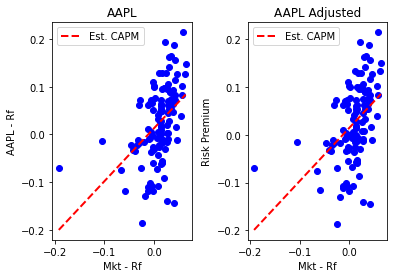

In [369]:
# g. Plot fitted results
fig = plt.figure()       # initialize figure window
fig.subplots_adjust(hspace=.5, wspace=0.4) # Use this to do some adjustments

# AAPL  
x = data['MKT_rp']       # Market risk premium
y = data['AAPL_rp']      # Risk premium of individual stock 
b = result_capm.params   # Estimated parameters

x_range = np.linspace(data['MKT_rp'].min(), data['MKT_rp'].max(), num = 200)
ax = fig.add_subplot(1, 2, 1)

plt.plot(x, y, color = 'blue', marker = 'o', linestyle = '')
plt.plot(x_range, b[0] + b[1]*x_range, color = 'red',
         linestyle = '--', linewidth = 2, label = 'Est. CAPM')
plt.xlabel('Mkt - Rf')
plt.ylabel('AAPL - Rf')
plt.legend()
ax.set_title('AAPL')        ## Use this to make a title for the plot

# AAPL_adj
x = data['MKT_rp']       # Market risk premium     
y = data['AAPL_Adj_rp']   # Risk premium of individual stock
b = result_capm_adj.params # Estimated parameters

x_range = np.linspace(data['MKT_rp'].min(), data['MKT_rp'].max(), num = 200)
ax = fig.add_subplot(1, 2, 2)

plt.plot(x, y, color = 'blue', marker = 'o', linestyle = '')
plt.plot(x_range, b[0] + b[1]*x_range, color = 'red', linestyle = '--', linewidth = 2, label = 'Est. CAPM')
plt.xlabel('Mkt - Rf')
plt.ylabel('Risk Premium')
ax.set_title('AAPL Adjusted')
plt.legend()

# Plot and save the plot
plt.savefig('capm_plots.png')